In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Studies/rohit/Bitcoin 5 Year prices.csv', index_col='Date')

In [4]:

df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
15/04/2018,8363.6,"8,004.60","8,411.50","8,004.60",160.26K
16/04/2018,8070.0,"8,362.20","8,412.90","7,908.50",197.70K
17/04/2018,7908.6,"8,070.00","8,171.70","7,852.80",162.59K
18/04/2018,8178.4,"7,908.50","8,227.60","7,895.30",163.26K
19/04/2018,8290.8,"8,179.00","8,303.70","8,126.70",155.08K


In [5]:
df = df["Price"].dropna()
df.size

1827

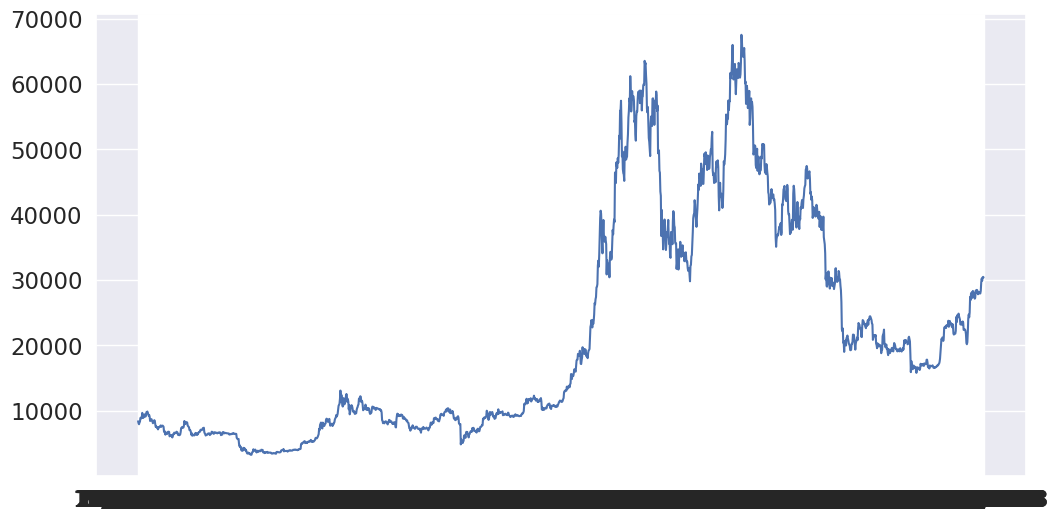

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df)

In [7]:
data = df.iloc[:]
hist = []
target = []
length = 90
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [8]:
print(hist[1][89])
print(data[90])
print(target[0])

6254.8
6254.8
6254.8


In [9]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [10]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [11]:
hist.shape

(1737, 90)

In [12]:
target.shape

(1737, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [14]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

(1737, 90, 1)


In [15]:
X_train = hist_scaled[:1637,:,:]
X_test = hist_scaled[1637:,:,:]
y_train = target_scaled[:1637,:]
y_test = target_scaled[1637:,:]

In [16]:
import tensorflow as tf
from tensorflow.keras import layers

In [17]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 90, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
52/52 [==============================] - 15s 139ms/step - loss: 0.0233
Epoch 2/30
52/52 [==============================] - 7s 134ms/step - loss: 0.0046
Epoch 3/30
52/52 [==============================] - 8s 144ms/step - loss: 0.0042
Epoch 4/30
52/52 [==============================] - 7s 128ms/step - loss: 0.0044
Epoch 5/30
52/52 [==============================] - 8s 146ms/step - loss: 0.0042
Epoch 6/30
52/52 [==============================] - 6s 123ms/step - loss: 0.0043
Epoch 7/30
52/52 [==============================] - 8s 152ms/step - loss: 0.0042
Epoch 8/30
52/52 [==============================] - 6s 119ms/step - loss: 0.0042
Epoch 9/30
52/52 [==============================] - 10s 197ms/step - loss: 0.0038
Epoch 10/30
52/52 [==============================] - 7s 130ms/step - loss: 0.0043
Epoch 11/30
52/52 [==============================] - 8s 144ms/step - loss: 0.0039
Epoch 12/30
52/52 [==============================] - 6s 125ms/step - loss: 0.0041
Epoch 13/30
52/52 [====

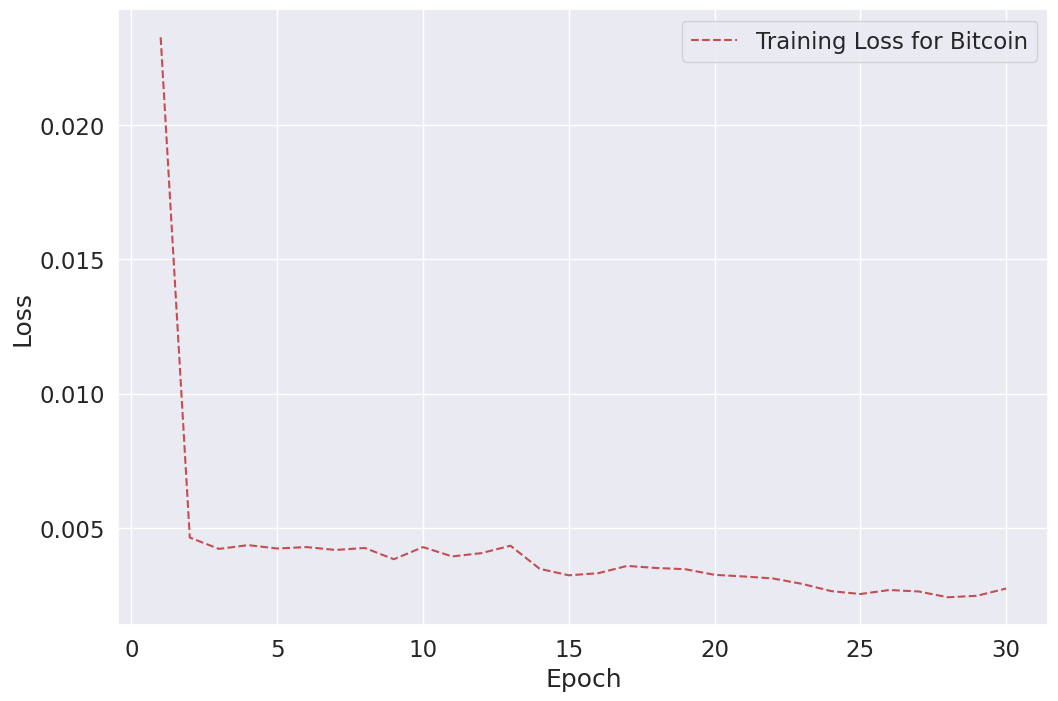

In [20]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss for Bitcoin'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

4/4 [==============================] - 1s 26ms/step


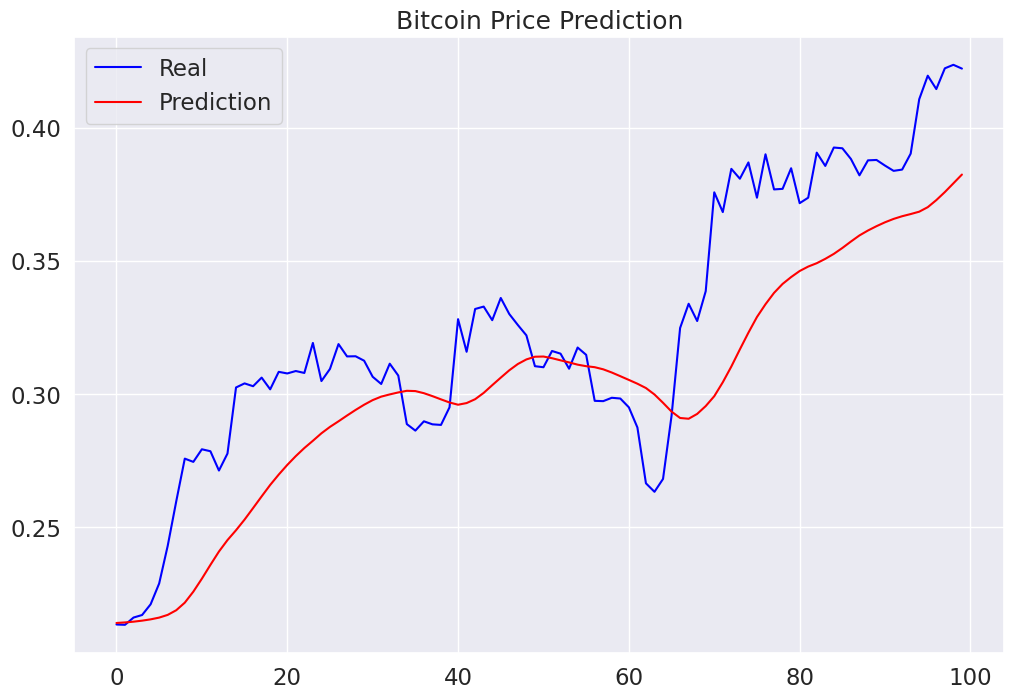

In [21]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

4/4 [==============================] - 0s 29ms/step


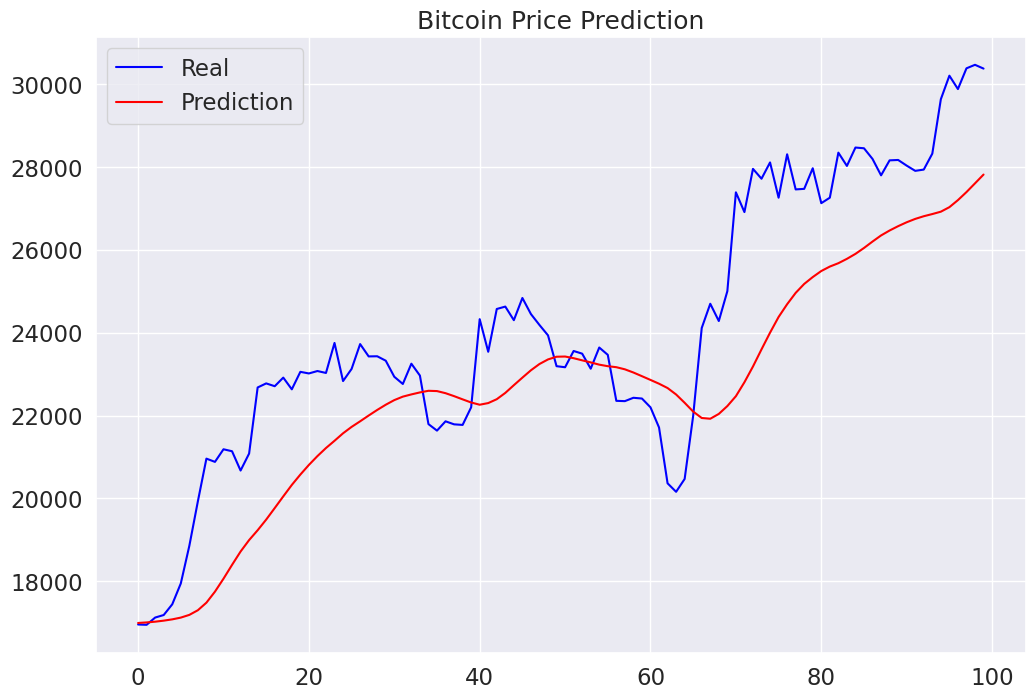

In [22]:
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test_transformed, color='blue', label='Real')
plt.plot(pred_transformed, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

In [23]:
math.sqrt(mean_squared_error(y_test_transformed, pred_transformed))

2108.870705230659

In [24]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test_transformed, pred_transformed)
print("Mean absolute error : " + str(error))

Mean absolute error : 1769.7426171874997


In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test_transformed, pred_transformed)
print("MAPE: ", error2)

MAPE:  7.169965704234578
